In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Section 1

C)

In [ ]:
from google.colab import files
uploaded=files.upload()
import io

dataset=pd.read_excel(io.BytesIO(uploaded['Mackey-Glass-Time-Series.xlsx']))

Saving Mackey-Glass-Time-Series.xlsx to Mackey-Glass-Time-Series.xlsx


In [ ]:
columns_df=['t','t-taw','t+1']

minmax = list()
mean_std = list()

#Min,Max, Mean and std in each columns
for col in columns_df:
  X_max = np.max(dataset[col])
  X_min = np.min(dataset[col])
  X_mean = np.mean(dataset[col])
  X_std =  np.std(dataset[col])
  minmax.append([X_min, X_max])
  mean_std.append([X_mean, X_std])
min_max = np.array(minmax)
mean_std = np.array(mean_std)

MinMax0_1 = list()
MinMax1_1 = list()
Standard = list()
Xmax    = list()

for col in columns_df:
  for j in range(len(columns_df)):
    X_minmax = (dataset[col] - min_max[j][0])/(min_max[j][1] - min_max[j][0])
    X_minmax1 = 2*(dataset[col] - min_max[j][0])/(min_max[j][1] - min_max[j][0]) -1
    X_standard = (dataset[col] - mean_std[j][0])/(mean_std[j][1])
    X_xmax = (dataset[col])/(min_max[j][1])

  MinMax0_1.append(X_minmax)
  MinMax1_1.append(X_minmax1)
  Standard.append(X_standard)
  Xmax.append(X_xmax)

df_MinMax0_1 = pd.DataFrame(MinMax0_1).T
df_MinMax1_1 = pd.DataFrame(MinMax1_1).T
df_Standard  = pd.DataFrame(Standard).T
df_Xmax      = pd.DataFrame(Xmax).T


#Export Excel files
df_MinMax0_1.to_excel('MinMax0_1.xlsx', index=False)
files.download('MinMax0_1.xlsx')

df_MinMax1_1.to_excel('MinMax1_1.xlsx', index=False)
files.download('MinMax1_1.xlsx')

df_Standard.to_excel('Standard.xlsx', index=False)
files.download('Standard.xlsx')


df_Xmax.to_excel('Xmax.xlsx', index=False)
files.download('Xmax.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Section 2

A)

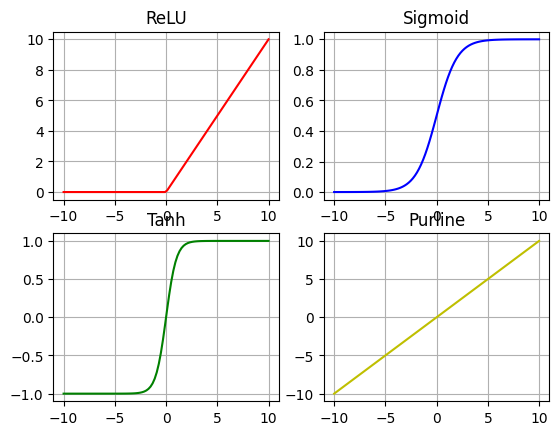

In [ ]:
def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def Tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def purline(x):
  return x

# Generate x dataset
x = np.linspace(-10, 10, 100)


figure, axis = plt.subplots(2,2)

axis[0, 0].plot(x, relu(x), 'r')
axis[0,0].set_title("ReLU")
axis[0,0].grid('True')

axis[0, 1].plot(x, sigmoid(x), 'b')
axis[0,1].set_title("Sigmoid")
axis[0,1].grid('True')

axis[1, 0].plot(x, Tanh(x), 'g')
axis[1, 0].set_title("Tanh")
axis[1, 0].grid('True')

axis[1, 1].plot(x, purline(x), 'y')
axis[1, 1].set_title("Purline")
axis[1, 1].grid('True')
plt.show()


B)

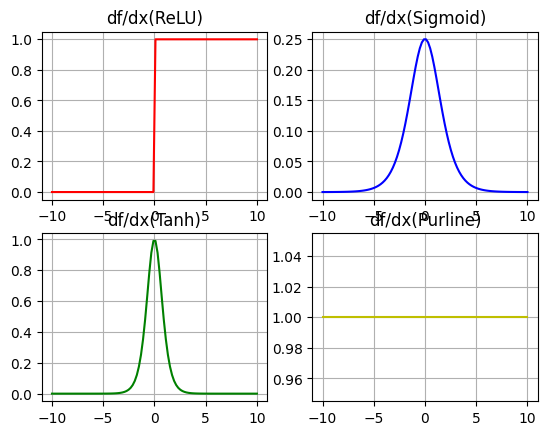

In [ ]:
def dfrelu(x):
  if x>0:
    return 1
  else:
    return 0

def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2

def dfpurline(x):
  return 1

x = np.linspace(-10, 10, 100)
y_dfrelu    = [dfrelu(i) for i in x]
y_dfpurline = [dfpurline(i) for i in x]

figure, axis = plt.subplots(2,2)

axis[0, 0].plot(x, y_dfrelu, 'r')
axis[0,0].set_title("df/dx(ReLU)")
axis[0, 0].grid('True')

axis[0, 1].plot(x, dfsigmoid(x), 'b')
axis[0,1].set_title("df/dx(Sigmoid)")
axis[0,1].grid('True')

axis[1, 0].plot(x, dfTanh(x), 'g')
axis[1, 0].set_title("df/dx(Tanh)")
axis[1, 0].grid('True')

axis[1, 1].plot(x, y_dfpurline, 'y')
axis[1, 1].set_title("df/dx(Purline)")
axis[1, 1].grid('True')
plt.show()


Section3

Generate Data

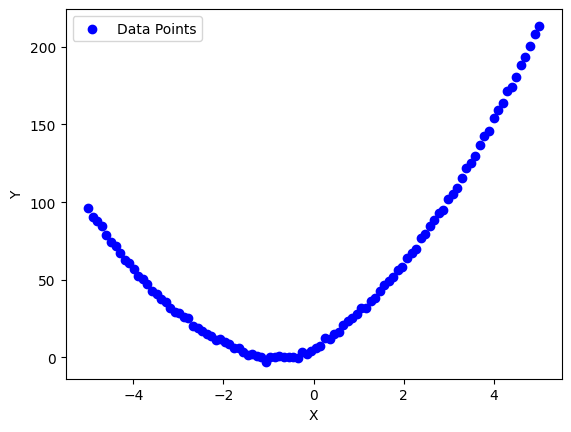

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def Tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def dfrelu(x):
  if x>0:
    return 1
  else:
    return 0

def dfsigmoid(x):
  return np.exp(-x)/(1 + np.exp(-x))**2

def dfTanh(x):
  return 4/(np.exp(x) + np.exp(-x))**2


# The nonlinear function: F = a1*logsig(t1*x) + a2*tansig(t2*x) + a3*Relu(t3*x) + a4*x^2 + a5*x + a6

def F(x, A,T):
    return A[0]*sigmoid(T[0]*x) + A[1]*Tanh(T[1]*x) + A[2]*relu(T[2]*x) + A[3]*x**2 + A[4]*x + A[5]

# Generate synthetic data
n = 100
x = np.linspace(-5, 5, n)
noise = np.random.normal(0, 1, n)
y_true = 2*sigmoid(1.5*x) + 3*Tanh(2*x) + 4*relu(2.5*x) + 5*x**2 + 6*x + 4 +noise  # True underlying relationship is F plus some noise

# Plot the data points
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Learn Parameter

Optimization Parameter A = [a1, a2, a3, a4, a5, a6]

Epoch 0, MSE: 9203688.266447721
Epoch 10, MSE: 4590129.579111472
Epoch 20, MSE: 5347.281063174263
Epoch 30, MSE: 24231.607916658097
Epoch 40, MSE: 922.6555306457756
Epoch 50, MSE: 444.7095069547984
Epoch 60, MSE: 141.43719896493548
Epoch 70, MSE: 27.60732358381227
Epoch 80, MSE: 9.465131655319848
Epoch 90, MSE: 7.23356864303689
Epoch 100, MSE: 4.3405347542512285
Epoch 110, MSE: 4.517326940171177
Epoch 120, MSE: 4.1736141720881355
Epoch 130, MSE: 4.090549524004031
Epoch 140, MSE: 3.961398368785874
Epoch 150, MSE: 3.846364648561007
Epoch 160, MSE: 3.7421865295823324
Epoch 170, MSE: 3.6419041260835745
Epoch 180, MSE: 3.5511630144787407
Epoch 190, MSE: 3.463200196553503
Epoch 200, MSE: 3.381016112256509
Epoch 210, MSE: 3.3012361490642768
Epoch 220, MSE: 3.2251123451191672
Epoch 230, MSE: 3.15162884159038
Epoch 240, MSE: 3.0810328707446257
Epoch 250, MSE: 3.013143561360819
Epoch 260, MSE: 2.947834921348744
Epoch 270, MSE: 2.8850626124038374
Epoch 280, MSE: 2.8246512127414434
Epoch 290, MSE:

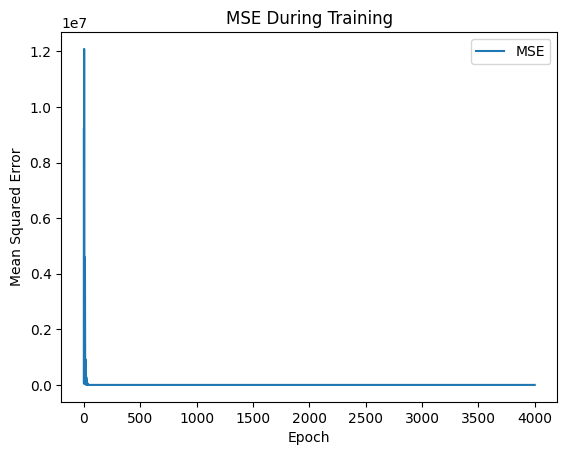

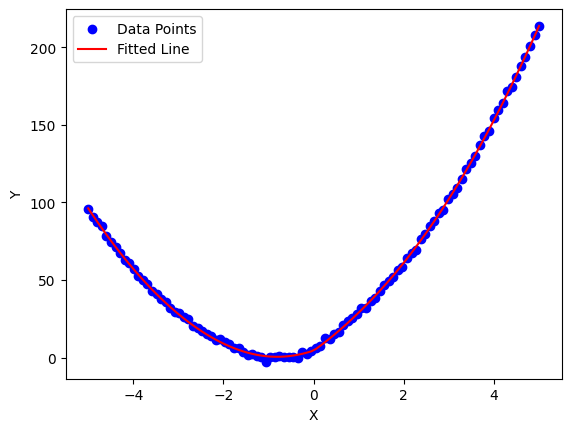

In [ ]:
# Random initialization of parameters
import numpy as np
np.random.seed(42)
epochs = 4000
A = np.random.rand(6)
T = np.random.rand(3)

#SGD
learning_rate_SGD =0.0007

#Momentoum
learning_rate_Momentoum = 0.0012
V_mo = np.zeros( 6)
beta_mo = 0.999

#AdaGrad
S_adgrad = np.zeros( 6)
epsilon_adagrad = pow(10,-6)
learning_rate_AdaGrad = 0.5

#RMSprop
S_RMS =np.zeros(6)
beta = 0.999
epsilon = pow(10,-6)
learning_rate_RMS = 0.0009

#Adadelat
S_adadelta = np.zeros(6)
D_adadelta = np.zeros(6)
beta_delat = 0.91
epsilon = pow(10,-6)

#Nestrov
learning_rate_Nes = 0.0007
beta_Nes = 0.97
V_Nes = np.zeros(6)


#Adam
S_hat  = np.zeros(6)
V_hat  = np.zeros(6)
V_adam = np.zeros(6)
S_adam = np.zeros(6)
learning_rate_Adam = 0.01
beta1_adm = 0.95
beta2_adm = 0.99
epsilon = pow(10, -8)

#Adamax
S_admax     = np.zeros(6)
V_admax     = np.zeros(6)
V_hat_admx       = np.zeros(6)
beta1 = 0.95
beta2 = 0.99
learning_rate_Adamax = 0.0007

#Nadam
beta1 = 0.95
beta2 = 0.99
learning_rate_Nadam = 0.001
S_hat_nadam =np.zeros(6)
V_hat_nadam =np.zeros(6)
S_nadam = np.zeros(6)
V_nadam = np.zeros(6)
epsilon = pow(10, -7)

#AMSGrad
beta1_AMSG = 0.999
beta2_AMSG = 0.9999
epsilon = pow(10, -7)
learning_rate_AMSG = 0.06
V_AMSG = np.zeros(6)
S_AMSG = np.zeros(6)
S_hat_AMSG = np.zeros(6)

mse_data = np.zeros(len(x))

# Initialize list to track MSE for each epoch
mse_history = []

# Gradient descent
for epoch in range(epochs):
    for i in range(len(x)):
        x_i = x[i]
        y_i = y_true[i]

        # Predicted value using the current parameters
        y_pred = F(x_i, A,T)
        error  = y_i - y_pred

        # Update parameters
        grad_A =  -1 * error*np.array([sigmoid(T[0]*x_i),Tanh(T[1]*x_i), relu(T[2]*x_i), x_i**2,x_i, 1])

        #SGD
        #A-= learning_rate_SGD * grad_A

        #Momentoum
        V_mo=  beta*V_mo+ (1-beta_mo)*grad_A
        A -= learning_rate_Momentoum*V_mo

        #AdaGrad
        #S_adgrad = S_adgrad+ (grad_A)**2
        #A -= (learning_rate_AdaGrad/(np.sqrt(S_adgrad+epsilon_adagrad)))*grad_A


        #RMSprop
        #S_RMS=beta*S_RMS+ (1-beta)*(grad_A)**2
        #A -= learning_rate_RMS/(np.sqrt(S_RMS+epsilon))*grad_A

        #Adadelta
        #S_adadelta = beta_delat*S_adadelta + (1-beta_delat)*(grad_A)**2
        #delta_A = -(np.sqrt(D_adadelta +epsilon))/(np.sqrt(S_adadelta +epsilon))*grad_A
        #D_adadelta = beta_delat*D_adadelta + (1-beta_delat)*(delta_A)**2
        #A += delta_A

        #Nestrov
        #V_Nes = beta_Nes*V_Nes + (1-beta_Nes)*(grad_A)
        #A -= learning_rate_Nes*V_Nes


        #Adam
        #V_adam = beta1_adm*V_adam + (1-beta1_adm)*grad_A
        #S_adam = beta2_adm*S_adam + (1-beta2_adm)*(grad_A)**2
        #V_hat = V_adam/(1-beta1_adm**(1+epoch))
        #S_hat = S_adam/(1-beta2_adm**(1+epoch))
        #A -= (learning_rate_Adam*V_hat)/(np.sqrt(S_hat)+epsilon)

        #Adamax
        #V_admax = beta1*V_admax + (1-beta1)*grad_A
        #S_admax = np.maximum(beta2, S_admax, abs(grad_A))
        #V_hat_admx = V_admax/(1-beta1**(epoch+1))
        #A -= (learning_rate_Adamax*V_hat_admx)/(S_admax)

        #Nadam
        #V_nadam = beta1*V_nadam + (1-beta1)*(grad_A)
        #S_nadam = beta2*S_nadam + (1-beta2)*(grad_A)**2
        #V_hat_nadam = (V_nadam)/(1-beta1**(epoch+1))
        #S_hat_nadam = (S_nadam)/(1-beta2**(epoch+1))
        #A -= learning_rate_Nadam*(beta1*V_hat_nadam + (1-beta1)*(grad_A)/(1-beta1**(epoch+1)))/(np.sqrt(S_hat_nadam)+epsilon)

        #AMSGrad
        #V_AMSG = beta1_AMSG*V_AMSG + (1-beta1_AMSG)*grad_A
        #S_AMSG = beta2_AMSG*S_AMSG + (1-beta2_AMSG)*(grad_A)**2
        #S_hat_AMSG = np.maximum(S_hat_AMSG, S_AMSG)
        #A -= (learning_rate_AMSG*V_AMSG)/(np.sqrt(S_hat_AMSG) + epsilon)




        # Update MSE
        mse_data[i] = (error** 2)/2

    # Calculate mean squared error for the epoch
    mse_history.append(np.mean(mse_data**2))

    # Print the MSE every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, MSE: {np.mean(mse_data**2)}")

# Print the final parameters
print(f"Trained parameter: a={A}")

# Plot the MSE over epochs
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.legend()
plt.show()

# Plot the final fitted function
y_pred = F(x, A, T)
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Optimization Parameter T = [t1, t2, t3]

Epoch 0, MSE: 42.94414234381579
Epoch 10, MSE: 6.7950976472736
Epoch 20, MSE: 6.8714059428169625
Epoch 30, MSE: 6.894267387265432
Epoch 40, MSE: 6.90531382620964
Epoch 50, MSE: 6.911644737698944
Epoch 60, MSE: 6.915409116934949
Epoch 70, MSE: 6.917646939441741
Epoch 80, MSE: 6.918936585662602
Epoch 90, MSE: 6.919622719171213
Epoch 100, MSE: 6.919920165498568
Epoch 110, MSE: 6.919967059385197
Epoch 120, MSE: 6.919854181068992
Epoch 130, MSE: 6.919642077512873
Epoch 140, MSE: 6.919371491600827
Epoch 150, MSE: 6.919069933343391
Epoch 160, MSE: 6.918755934462454
Epoch 170, MSE: 6.918441864872843
Epoch 180, MSE: 6.918135831449148
Epoch 190, MSE: 6.917842977421692
Epoch 200, MSE: 6.917566382547975
Epoch 210, MSE: 6.917307692870538
Epoch 220, MSE: 6.917067564663397
Epoch 230, MSE: 6.916845979123594
Epoch 240, MSE: 6.916642466203839
Epoch 250, MSE: 6.916456264012245
Epoch 260, MSE: 6.916286432185998
Epoch 270, MSE: 6.91613193219463
Epoch 280, MSE: 6.915991683779458
Epoch 290, MSE: 6.9158646041

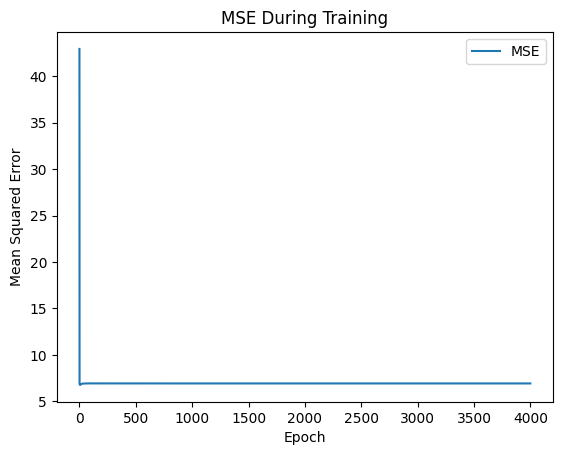

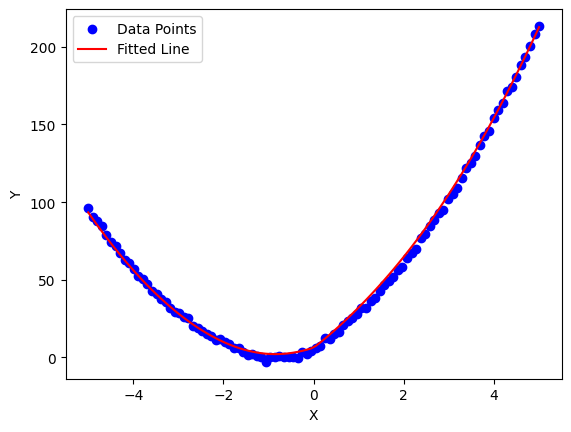

In [ ]:
# Random initialization of parameters
import numpy as np
np.random.seed(42)
epochs = 4000
A = np.random.uniform(4, 5, 6)# np.random.rand(6)
T = np.random.rand(3)

#SGD
learning_rate_SGD = 0.0028

#Momentoum
learning_rate_Momentoum = 0.0021
V_mo = np.zeros(3)
beta_mo =0.09

#AdaGrad
S_adgrad = np.zeros(3)
epsilon_adagrad = pow(10,-20)
learning_rate_AdaGrad = 0.06

#RMSprop
S_RMS =np.zeros(3)
beta = 0.999
epsilon = pow(10,-6)
learning_rate_RMS = 0.05

#Adadelat
S_adadelta = np.zeros(3)
D_adadelta = np.zeros(3)
beta_delat = 0.99
epsilon = pow(10,-6)

#Nestrov
learning_rate_Nes = 0.009
beta_Nes = 0.7
V_Nes = np.zeros(3)


#Adam
S_hat  = np.zeros(3)
V_hat  = np.zeros(3)
V_adam = np.zeros(3)
S_adam = np.zeros(3)
learning_rate_Adam = 0.001
beta1_adam = 0.999
beta2_adam = 0.9999
epsilon = pow(10, -8)

#Adamax
S_admax     = np.zeros(3)
V_admax     = np.zeros(3)
V_hat       = np.zeros(3)
beta1 = 0.999
beta2 = 0.9999
learning_rate_Adamax = 0.00001

#Nadam
beta1_N = 0.9999
beta2_N = 0.99999
learning_rate_Nadam = 0.001
S_hat_nadam =np.zeros(3)
V_hat_nadam =np.zeros(3)
S_nadam = np.zeros(3)
V_nadam = np.zeros(3)
epsilon = pow(10, -7)

#AMSGrad
beta1_AMSG = 0.9999
beta2_AMSG = 0.99999
epsilon = pow(10, -7)
learning_rate_AMSG = 0.0007
V_AMSG = np.zeros(3)
S_AMSG = np.zeros(3)
S_hat_AMSG = np.zeros(3)

mse_data = np.zeros(len(x))

# Initialize list to track MSE for each epoch
mse_history = []

# Gradient descent
for epoch in range(epochs):
    for i in range(len(x)):
        x_i = x[i]
        y_i = y_true[i]

        # Predicted value using the current parameters
        y_pred = F(x_i, A,T)
        error  = y_i - y_pred

        grad_T = -1*error*np.array([A[0]*x_i*dfsigmoid(T[0]*x_i), A[1]*x_i*dfTanh(T[1]*x_i), A[2]*x_i*dfrelu(T[2]*x_i)])

        # Update parameters

        #SGD
        T-= learning_rate_SGD*grad_T

        #Momentoum
        #V_mo=  beta_mo*V_mo+ (1-beta_mo)*grad_T
        #T -= learning_rate_Momentoum*V_mo

        #AdaGrad
        #S_adgrad = S_adgrad+ (grad_T)**2
        #T -= (learning_rate_AdaGrad*grad_T/np.sqrt(S_adgrad+epsilon_adagrad))


        #RMSprop
        #S_RMS=beta*S_RMS+ (1-beta)*(grad_T)**2
        #T -= learning_rate_RMS/(np.sqrt(S_RMS+epsilon))*grad_T

        #Adadelta
        #S_adadelta = beta_delat*S_adadelta + (1-beta_delat)*(grad_T)**2
        #delta_T = -(np.sqrt(D_adadelta +epsilon))/(np.sqrt(S_adadelta +epsilon))*grad_T
        #D_adadelta = beta_delat*D_adadelta + (1-beta_delat)*(delta_T)**2
        #T += delta_T

        #Nestrov
        #V_Nes = beta_Nes*V_Nes + (1-beta_Nes)*(grad_T)
        #T -= learning_rate_Nes*V_Nes


        #Adam
        #V_adam = beta1_adam*V_adam + (1-beta1_adam)*grad_T
        #S_adam = beta2_adam*S_adam + (1-beta2_adam)*(grad_T)**2
        #V_hat = V_adam/(1-beta1_adam**(1+epoch))
        #S_hat = S_adam/(1-beta2_adam**(1+epoch))
        #T -= (learning_rate_Adam*V_hat)/(np.sqrt(S_hat)+epsilon)

        #Adamax
        #V_admax = beta1*V_admax + (1-beta1)*grad_T
        #S_admax = np.maximum(beta2, S_admax, abs(grad_T))
        #V_hat = V_admax/(1-beta1**(epoch+1))
        #T -= (learning_rate_Adamax*V_hat)/(S_admax)

        #Nadam
        #V_nadam = beta1_N*V_nadam + (1-beta1_N)*(grad_T)
        #S_nadam = beta2_N*S_nadam + (1-beta2_N)*(grad_T)**2
        #V_hat_nadam = (V_nadam)/(1-beta1_N**(epoch+1))
        #S_hat_nadam = (S_nadam)/(1-beta2_N**(epoch+1))
        #T -= learning_rate_Nadam*(beta1_N*V_hat_nadam + (1-beta1_N)*(grad_T)/(1-beta1**(epoch+1)))/(np.sqrt(S_hat_nadam)+epsilon)

        #AMSGrad
        #V_AMSG = beta1_AMSG*V_AMSG + (1-beta1_AMSG)*grad_T
        #S_AMSG = beta2_AMSG*S_AMSG + (1-beta2_AMSG)*(grad_T)**2
        #S_hat_AMSG = np.maximum(S_hat_AMSG, S_AMSG)
        #T -= (learning_rate_AMSG*V_AMSG)/(np.sqrt(S_hat_AMSG) + epsilon)




        # Update MSE
        mse_data[i] = (error** 2)/2

    # Calculate mean squared error for the epoch
    mse_history.append(np.mean(mse_data**2))

    # Print the MSE every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, MSE: {np.mean(mse_data**2)}")

# Print the final parameters
print(f"Trained parameter: T={T}")

# Plot the MSE over epochs
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.legend()
plt.show()

# Plot the final fitted function
y_pred = F(x, A, T)
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Optimization Parameter T = [t1, t2, t3] and A = [a1, a2, a3, a4, a5, a6]

Epoch 0, MSE: 4212662.423000485
Epoch 10, MSE: 10.210804895424408
Epoch 20, MSE: 8.178508065615652
Epoch 30, MSE: 7.98482284197837
Epoch 40, MSE: 7.785798702086558
Epoch 50, MSE: 7.593108216778697
Epoch 60, MSE: 7.406362481564623
Epoch 70, MSE: 7.225127630639406
Epoch 80, MSE: 7.049057100607606
Epoch 90, MSE: 6.877873389433437
Epoch 100, MSE: 6.711352239919567
Epoch 110, MSE: 6.549310219508259
Epoch 120, MSE: 6.39159498783354
Epoch 130, MSE: 6.238077683680473
Epoch 140, MSE: 6.088646986991131
Epoch 150, MSE: 5.9432045066731245
Epoch 160, MSE: 5.801661218425861
Epoch 170, MSE: 5.663934733971482
Epoch 180, MSE: 5.52994722788463
Epoch 190, MSE: 5.399623883527394
Epoch 200, MSE: 5.272891747565084
Epoch 210, MSE: 5.149678904783811
Epoch 220, MSE: 5.029913902683601
Epoch 230, MSE: 4.913525369523991
Epoch 240, MSE: 4.800441780894716
Epoch 250, MSE: 4.690591339031509
Epoch 260, MSE: 4.58390193645705
Epoch 270, MSE: 4.480301181445882
Epoch 280, MSE: 4.37971646757666
Epoch 290, MSE: 4.2820750734

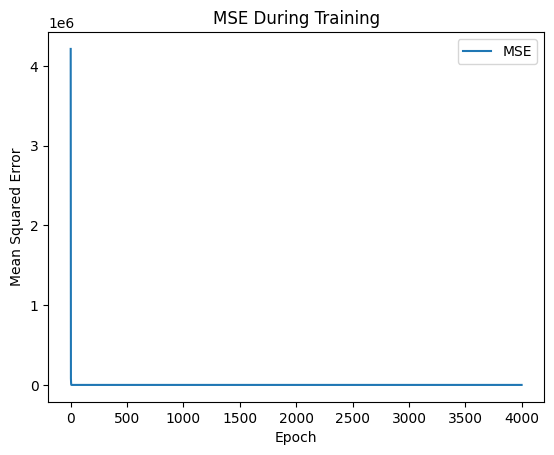

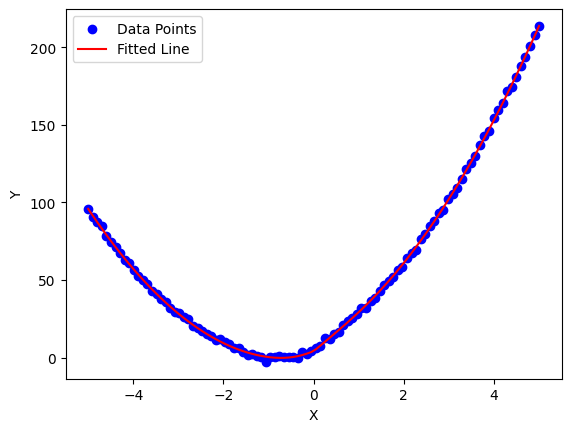

In [ ]:
# Random initialization of parameters
import numpy as np
np.random.seed(42)
epochs = 4000
A = np.random.rand(6)
T = np.random.rand(3)
Aold = A


#SGD
learning_rate_SGD = 0.000085

#Momentoum
learning_rate_Momentoum = 0.000001
V_mo_A = np.zeros(6)
V_mo_T = np.zeros(3)
beta_mo = 0.9

#AdaGrad
S_adgrad_A = np.zeros(6)
S_adgrad_T = np.zeros(3)
epsilon_adagrad = pow(10,-6)
learning_rate_AdaGrad = 0.46

#RMSprop
S_RMS_A = np.zeros(6)
S_RMS_T =np.zeros(3)
beta = 0.999
epsilon = pow(10,-6)
learning_rate_RMS =0.0005



#Adadelat
S_adadelta_A = np.zeros(6)
D_adadelta_A = np.zeros(6)
S_adadelta_T = np.zeros(3)
D_adadelta_T = np.zeros(3)

beta_delat = 0.99
epsilon = pow(10,-6)

#Nestrov
learning_rate_Nes = 0.0002
beta_Nes = 0.95
V_Nes_T = np.zeros(3)
V_Nes_A = np.zeros(6)


#Adam
S_hat_A  = np.zeros(6)
V_hat_A  = np.zeros(6)
V_adam_A = np.zeros(6)
S_adam_A = np.zeros(6)

S_hat_T  = np.zeros(3)
V_hat_T  = np.zeros(3)
V_adam_T = np.zeros(3)
S_adam_T = np.zeros(3)

learning_rate_Adam = 0.003
beta1 = 0.9
beta2 = 0.99
epsilon = pow(10, -8)

#Adamax
S_admax_T     = np.zeros(3)
V_admax_T     = np.zeros(3)
V_hat_T       = np.zeros(3)

S_admax_A     = np.zeros(6)
V_admax_A     = np.zeros(6)
V_hat_A       = np.zeros(6)

beta1 = 0.9
beta2 = 0.99
learning_rate_Adamax = 0.0001

#Nadam
beta1 = 0.9
beta2 = 0.99
learning_rate_Nadam = 0.0005
S_hat_nadam_T =np.zeros(3)
V_hat_nadam_T =np.zeros(3)
S_nadam_T = np.zeros(3)
V_nadam_T = np.zeros(3)
epsilon = pow(10, -7)

S_hat_nadam_A =np.zeros(6)
V_hat_nadam_A =np.zeros(6)
S_nadam_A = np.zeros(6)
V_nadam_A = np.zeros(6)

#AMSGrad
beta1_AMSG = 0.99
beta2_AMSG = 0.999
epsilon = pow(10, -7)
learning_rate_AMSG = 0.01

V_AMSG_A = np.zeros(6)
S_AMSG_A = np.zeros(6)
S_hat_AMSG_A = np.zeros(6)

V_AMSG_T = np.zeros(3)
S_AMSG_T = np.zeros(3)
S_hat_AMSG_T = np.zeros(3)

mse_data = np.zeros(len(x))

# Initialize list to track MSE for each epoch
mse_history = []

# Gradient descent
for epoch in range(epochs):
    for i in range(len(x)):
        x_i = x[i]
        y_i = y_true[i]

        # Predicted value using the current parameters
        y_pred = F(x_i, A,T)
        error  = y_i - y_pred


        # Update parameters
        grad_A = -1*error*np.array([sigmoid(T[0]*x_i),Tanh(T[1]*x_i), relu(T[2]*x_i), x_i**2,x_i, 1])
        grad_T = -1*error*np.array([A[0]*x_i*dfsigmoid(T[0]*x_i), A[1]*x_i*dfTanh(T[1]*x_i), A[2]*x_i*dfrelu(T[2]*x_i)])

        #SGD

        A -= learning_rate_SGD*grad_A
        T -= learning_rate_SGD*grad_T

        #Momentoum
        #V_mo_A = beta*V_mo_A + (1-beta_mo)*grad_A
        #A -= learning_rate_Momentoum*V_mo_A
        #V_mo_T=  beta*V_mo_T+ (1-beta_mo)*grad_T
        #T -= learning_rate_Momentoum*V_mo_T

        #AdaGrad
        #S_adgrad_A = S_adgrad_A+ (grad_A)**2
        #A -= (learning_rate_AdaGrad/(np.sqrt(S_adgrad_A+epsilon_adagrad)))*grad_A

        #S_adgrad_T = S_adgrad_T + (grad_T)**2
        #T -= (learning_rate_AdaGrad/np.sqrt(S_adgrad_T+epsilon_adagrad))*grad_T


        #RMSprop
        #S_RMS_A = beta*S_RMS_A + (1-beta)*(grad_A)**2
        #A -= (learning_rate_RMS /np.sqrt(S_RMS_A + epsilon))*grad_A

        #S_RMS=beta*S_RMS_T+ (1-beta)*(grad_T)**2
        #T -= (learning_rate_RMS/np.sqrt(S_RMS_T+epsilon))*grad_T

        #Adadelta
        #S_adadelta_A = beta_delat*S_adadelta_A + (1-beta_delat)*(grad_A)**2
        #delta_A = -(np.sqrt(D_adadelta_A +epsilon))/(np.sqrt(S_adadelta_A +epsilon))*grad_A
        #D_adadelta_A = beta_delat*D_adadelta_A + (1-beta_delat)*(delta_A)**2
        #A += delta_A

        #S_adadelta_T = beta_delat*S_adadelta_T + (1-beta_delat)*(grad_T)**2
        #delta_T = -(np.sqrt(D_adadelta_T +epsilon))/(np.sqrt(S_adadelta_T +epsilon))*grad_T
        #D_adadelta_T = beta_delat*D_adadelta_T + (1-beta_delat)*(delta_T)**2
        #T += delta_T

        #Nestrov
        #V_Nes_A = beta_Nes*V_Nes_A + (1-beta_Nes)*(grad_A)
        #A -= learning_rate_Nes*V_Nes_A
        #V_Nes_T = beta_Nes*V_Nes_T + (1-beta_Nes)*(grad_T)
        #T -= learning_rate_Nes*V_Nes_T


        #Adam
        #V_adam_A = beta1*V_adam_A + (1-beta1)*grad_A
        #S_adam_A = beta2*S_adam_A + (1-beta2)*(grad_A)**2
        #V_hat_A = V_adam_A/(1-beta1**(1+epoch))
        #S_hat_A = S_adam_A/(1-beta2**(1+epoch))
        #A -= (learning_rate_Adam*V_hat_A)/(np.sqrt(S_hat_A)+epsilon)

        #V_adam_T = beta1*V_adam_T + (1-beta1)*grad_T
        #S_adam_T = beta2*S_adam_T + (1-beta2)*(grad_T)**2
        #V_hat_T = V_adam_T/(1-beta1**(1+epoch))
        #S_hat_T = S_adam_T/(1-beta2**(1+epoch))
        #T -= (learning_rate_Adam*V_hat_T)/(np.sqrt(S_hat_T)+epsilon)

        #Adamax
        #V_admax_A = beta1*V_admax_A + (1-beta1)*grad_A
        #S_admax_A = np.maximum(beta2,S_admax_A, abs(grad_A))
        #V_hat_A = V_admax_A/(1-beta1**(epoch+1))
        #A -= (learning_rate_Adamax*V_hat_A)/(S_admax_A)

        #V_admax_T = beta1*V_admax_T + (1-beta1)*grad_T
        #S_admax_T = np.maximum(beta2, S_admax_T, abs(grad_T))
        #V_hat_T = V_admax_T/(1-beta1**(epoch+1))
        #T -= (learning_rate_Adamax*V_hat_T)/(S_admax_T)

        #Nadam
        #V_nadam_A = beta1*V_nadam_A + (1-beta1)*(grad_A)
        #S_nadam_A = beta2*S_nadam_A + (1-beta2)*(grad_A)**2
        #V_hat_nadam_A = (V_nadam_A)/(1-beta1**(epoch+1))
        #S_hat_nadam_A = (S_nadam_A)/(1-beta2**(epoch+1))
        #A -= learning_rate_Nadam*(beta1*V_hat_nadam_A + (1-beta1)*(grad_A)/(1-beta1**(epoch+1)))/(np.sqrt(S_hat_nadam_A)+epsilon)

        #V_nadam_T = beta1*V_nadam_T + (1-beta1)*(grad_T)
        #S_nadam_T = beta2*S_nadam_T + (1-beta2)*(grad_T)**2
        #V_hat_nadam_T = (V_nadam_T)/(1-beta1**(epoch+1))
        #S_hat_nadam_T = (S_nadam_T)/(1-beta2**(epoch+1))
        #T -= learning_rate_Nadam*(beta1*V_hat_nadam_T + (1-beta1)*(grad_T)/(1-beta1**(epoch+1)))/(np.sqrt(S_hat_nadam_T)+epsilon)

        #AMSGrad
        # V_AMSG_A = beta1_AMSG*V_AMSG_A + (1-beta1_AMSG)*grad_A
        # S_AMSG_A = beta2_AMSG*S_AMSG_A + (1-beta2_AMSG)*(grad_A)**2
        # S_hat_AMSG_A = np.maximum(S_hat_AMSG_A, S_AMSG_A)
        # A -= (learning_rate_AMSG*V_AMSG_A)/(np.sqrt(S_hat_AMSG_A) + epsilon)

        # V_AMSG_T = beta1_AMSG*V_AMSG_T + (1-beta1_AMSG)*grad_T
        # S_AMSG_T = beta2_AMSG*S_AMSG_T + (1-beta2_AMSG)*(grad_T)**2
        # S_hat_AMSG_T = np.maximum(S_hat_AMSG_T, S_AMSG_T)
        # T -= (learning_rate_AMSG*V_AMSG_T)/(np.sqrt(S_hat_AMSG_T) + epsilon)




        # Update MSE
        mse_data[i] = (error** 2)/2

    # Calculate mean squared error for the epoch
    mse_history.append(np.mean(mse_data**2))

    # Print the MSE every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, MSE: {np.mean(mse_data**2)}")

# Print the final parameters
print(f"Trained parameter: A={A}")
print(f"Trained parameter: T={T}")

# Plot the MSE over epochs
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.legend()
plt.show()


# Plot the final fitted function
y_pred = F(x, A, T)
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

4) Improving Adam Optimizer
EAdam Optimizer: How epsilon Impact Adam
Wei Yuan, Kai-Xin Gao

Epoch 0, EAdam_MSE: 284385.13884679024
Epoch 10, EAdam_MSE: 138663.91364601444
Epoch 20, EAdam_MSE: 93239.63823887202
Epoch 30, EAdam_MSE: 61104.52279818827
Epoch 40, EAdam_MSE: 37681.34295075893
Epoch 50, EAdam_MSE: 21634.41594995748
Epoch 60, EAdam_MSE: 11578.572488245754
Epoch 70, EAdam_MSE: 5846.951930938074
Epoch 80, EAdam_MSE: 2839.652386758032
Epoch 90, EAdam_MSE: 1339.6254932850818
Epoch 100, EAdam_MSE: 602.4062633700428
Epoch 110, EAdam_MSE: 248.0453428390183
Epoch 120, EAdam_MSE: 92.85457922542992
Epoch 130, EAdam_MSE: 35.96009130394078
Epoch 140, EAdam_MSE: 19.105245920140398
Epoch 150, EAdam_MSE: 15.050180837470418
Epoch 160, EAdam_MSE: 14.17661590435657
Epoch 170, EAdam_MSE: 13.845841003597684
Epoch 180, EAdam_MSE: 13.607144203607989
Epoch 190, EAdam_MSE: 13.412174439280914
Epoch 200, EAdam_MSE: 13.251646642200946
Epoch 210, EAdam_MSE: 13.119116085714907
Epoch 220, EAdam_MSE: 13.008867748423086
Epoch 230, EAdam_MSE: 12.91607293101922
Epoch 240, EAdam_MSE: 12.83681688512293

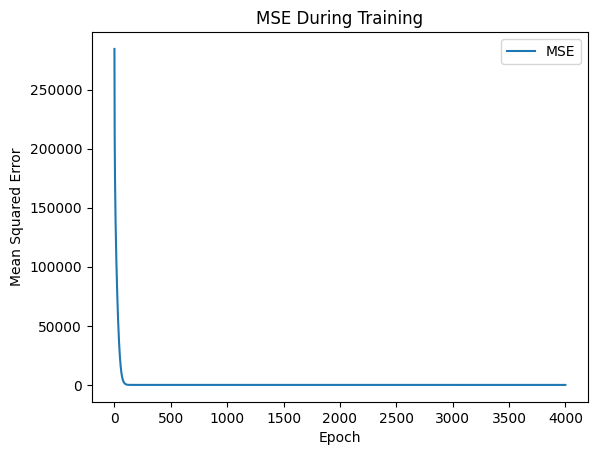

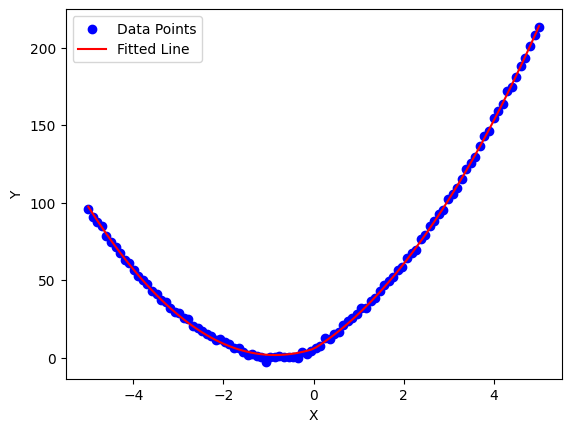

In [ ]:
# @title Default title text
# Random initialization of parameters
import numpy as np
np.random.seed(42)
epochs = 4000
A = np.random.uniform(4,5,6)#np.random.rand(6)
E_A = np.random.rand(6)
T = np.random.rand(3)


#Adam
S_hat  = np.zeros(6)
V_hat  = np.zeros(6)
V_adam = np.zeros(6)
S_adam = np.zeros(6)
learning_rate_Adam = 0.001
beta1 = 0.95
beta2 = 0.99
epsilon = pow(10, -8)

#EAdam
E_S_hat  = np.zeros(6)
E_V_hat  = np.zeros(6)
E_V_adam = np.zeros(6)
E_S_adam = np.zeros(6)


learning_rate_Adam = 0.002
beta1 = 0.9
beta2 = 0.999
epsilon = pow(10, -8)


mse_data = np.zeros(len(x))
E_mse_data = np.zeros(len(x))

# Initialize list to track MSE for each epoch
mse_history = []
E_mse_history = []

# Gradient descent
for epoch in range(epochs):
    for i in range(len(x)):
        x_i = x[i]
        y_i = y_true[i]

        # Predicted value using the current parameters
        y_pred = F(x_i, A,T)
        error  = y_i - y_pred

        # Update parameters
        grad_A =  -1 * error*np.array([sigmoid(T[0]*x_i),Tanh(T[1]*x_i), relu(T[2]*x_i), x_i**2,x_i, 1])


        #Adam
        # V_adam = beta1*V_adam + (1-beta1)*grad_A
        # S_adam = beta2*S_adam + (1-beta2)*(grad_A)**2
        # V_hat = V_adam/(1-beta1**(1+epoch))
        # S_hat = S_adam/(1-beta2**(1+epoch))
        # A -= (learning_rate_Adam*V_hat)/(np.sqrt(S_hat)+epsilon)

        #EAdam
        E_V_adam = beta1*E_V_adam + (1-beta1)*grad_A
        E_S_adam = beta2*E_S_adam + (1-beta2)*(grad_A)**2
        E_S_adam = E_S_adam + epsilon
        E_V_hat = E_V_adam/(1-beta1**(1+epoch))
        E_S_hat = E_S_adam/(1-beta2**(1+epoch))
        A -= (learning_rate_Adam*E_V_hat)/np.sqrt(E_S_hat)





        # Update MSE
        #mse_data[i] = (error** 2)/2
        mse_data[i] = (error** 2)/2

    # Calculate mean squared error for the epoch
    mse_history.append(np.mean(mse_data**2))

    # Print the MSE every 100 epochs
    if epoch % 10 == 0:
        #print(f"Epoch {epoch}, Adam_MSE: {np.mean(mse_data**2)}")
        print(f"Epoch {epoch}, EAdam_MSE: {np.mean(mse_data**2)}")


# Print the final parameters
#print(f"Trained parameter: a={A}")
print(f"Trained parameter: e_a={A}")
'''
# Plot the MSE over epochs
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.legend()
plt.show()
'''
# Plot the MSE over epochs
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.legend()
plt.show()
'''
# Plot the final fitted function
y_pred = F(x, A, T)
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
'''
y_pred = F(x, A, T)
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


4) An Improved Adam Optimization Algorithm Combining Adaptive Coefficients and Composite Gradients Based on Randomized Block Coordinate Descent https://doi.org/10.1155/2023/4765891

Epoch 0, MSE: 229041.16213320367
Epoch 10, MSE: 59.669255505445456
Epoch 20, MSE: 12.358903674511634
Epoch 30, MSE: 7.11793399318218
Epoch 40, MSE: 5.84748981497447
Epoch 50, MSE: 5.236122180025035
Epoch 60, MSE: 5.166744500695339
Epoch 70, MSE: 5.182265358588089
Epoch 80, MSE: 5.098626820675213
Epoch 90, MSE: 5.043108540086185
Epoch 100, MSE: 5.11858126000345
Epoch 110, MSE: 5.074994257915574
Epoch 120, MSE: 5.122304963010204
Epoch 130, MSE: 5.090985872869836
Epoch 140, MSE: 5.200746123335974
Epoch 150, MSE: 5.1200991325190595
Epoch 160, MSE: 5.054524607756977
Epoch 170, MSE: 5.062036312848778
Epoch 180, MSE: 4.975973530926016
Epoch 190, MSE: 5.030946281656707
Epoch 200, MSE: 4.9584665150506275
Epoch 210, MSE: 4.927860839614743
Epoch 220, MSE: 4.91898556837636
Epoch 230, MSE: 4.871977531268781
Epoch 240, MSE: 4.667232250824044
Epoch 250, MSE: 4.689823475892452
Epoch 260, MSE: 4.690435516497902
Epoch 270, MSE: 4.58380144639906
Epoch 280, MSE: 4.612738596540654
Epoch 290, MSE: 4.5286216

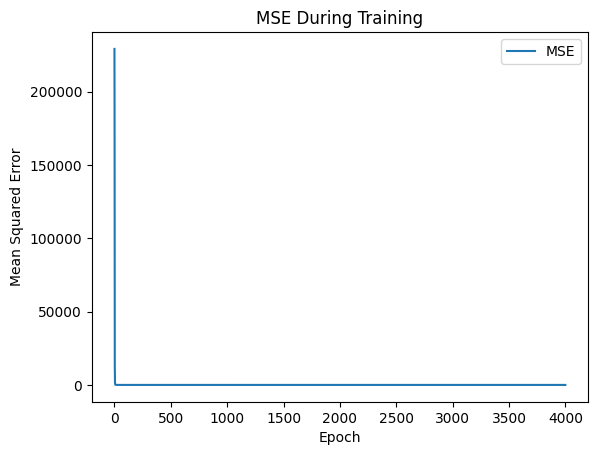

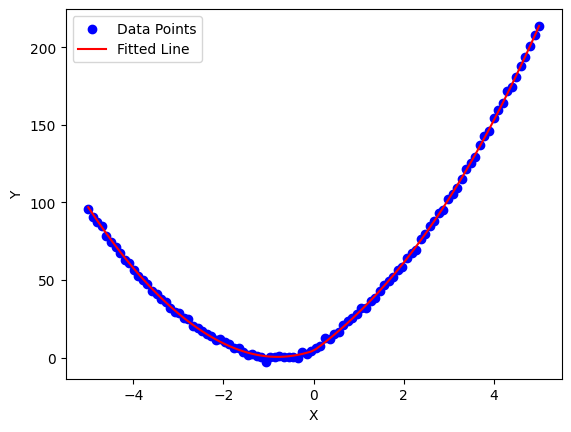

In [ ]:
# Random initialization of parameters
import numpy as np
np.random.seed(42)
epochs = 4000
A = np.random.rand(6)
T = np.random.rand(3)
D = np.diag(np.random.rand(6))



#Adam
S_hat  = np.zeros(6)
V_hat  = np.zeros(6)
V_adam = np.zeros(6)
S_adam = np.zeros(6)
learning_rate_Adam = 0.0001
beta1 = 0.95
beta2 = 0.99
epsilon = pow(10, -8)
L = 1000

mse_data = np.zeros(len(x))

# Initialize list to track MSE for each epoch
mse_history = []

# Gradient descent
for epoch in range(epochs):
    for i in range(len(x)):
        x_i = x[i]
        y_i = y_true[i]

        # Predicted value using the current parameters
        y_pred = F(x_i, A,T)
        error  = y_i - y_pred

        # Update parameters
        grad_A =  -1 * error*np.array([sigmoid(T[0]*x_i),Tanh(T[1]*x_i), relu(T[2]*x_i), x_i**2,x_i, 1])

        #ACGB-Adam
        D = np.diag(np.random.rand(6))
        A -= (1/L)*grad_A
        g = D.dot(grad_A)
        A -= learning_rate_Adam*g
        mu = grad_A
        V_adam = beta1*V_adam + (1-beta1)*(grad_A + mu)
        S_adam = beta2*S_adam + (1-beta2)*(grad_A)**2
        S_hat = S_adam/(1-beta2**(1+epoch))
        V_hat = V_adam/(1-beta1**(1+epoch))
        A -= (learning_rate_Adam*V_hat)/(np.sqrt(S_hat)+epsilon)

        #Aadam
        # V_adam = beta1*V_adam + (1-beta1)*grad_A
        # S_adam = beta2*S_adam + (1-beta2)*(grad_A)**2
        # V_hat = V_adam/(1-beta1**(1+epoch))
        # S_hat = S_adam/(1-beta2**(1+epoch))
        # A -= (learning_rate_Adam*V_hat)/(np.sqrt(S_hat)+epsilon)


         # Update MSE
        mse_data[i] = (error** 2)/2

    # Calculate mean squared error for the epoch
    mse_history.append(np.mean(mse_data**2))

    # Print the MSE every 100 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, MSE: {np.mean(mse_data**2)}")

# Print the final parameters
print(f"Trained parameter: a={A}")

# Plot the MSE over epochs
plt.plot(mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.legend()
plt.show()

# Plot the final fitted function
y_pred = F(x, A, T)
plt.scatter(x, y_true, label='Data Points', color='blue')
plt.plot(x, y_pred, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()